In [10]:
import sofar as sf
import pyfar as pf
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

input_sofa = Path("../assets") / "pp2_HRIRs_measured.sofa"
output_sofa = Path("../assets") / "pp2_HRIRs_measured_time_aligned.sofa"

# read Sofa file

In [27]:
sofa = sf.read_sofa(input_sofa)

In [22]:
sofa.inspect()

SimpleFreeFieldHRIR 1.0 (SOFA version 1.0)
-------------------------------------------
GLOBAL_Conventions : SOFA
GLOBAL_Version : 1.0
GLOBAL_SOFAConventions : SimpleFreeFieldHRIR
GLOBAL_SOFAConventionsVersion : 1.0
GLOBAL_APIName : ARI SOFA API for Matlab/Octave
GLOBAL_APIVersion : 1.0.3
GLOBAL_AuthorContact : fabian.brinkmann@mailbox.org; manoj.fma@gmail.com
GLOBAL_DataType : FIR
GLOBAL_License : cc-by 4.0 (https://creativecommons.org/licenses/by/4.0/)
GLOBAL_Organization : Audio Communication Group, Technical University Berlin; HUAWEI Munich Research Center; Sennheiser
GLOBAL_RoomType : free field
GLOBAL_DateCreated : 2018-09-17 15:28:15
GLOBAL_DateModified : 2018-10-23 16:06:34
GLOBAL_Title : head-related impulse responses
GLOBAL_DatabaseName : HUTUBS
GLOBAL_ListenerShortName : pp2
ListenerPosition : (I=1, C=3)
  [0. 0. 0.]
ListenerPosition_Type : cartesian
ListenerPosition_Units : metre
ReceiverPosition : (R=2, C=3, I=1)
  [[ 0.    0.75  0.  ]
   [ 0.   -0.75  0.  ]]
ReceiverPositi

In [28]:
start_times = []
sussy_start_times = []
for i, source in enumerate(sofa.Data_IR):
    for j, ir in enumerate(source):
        ir_signal = pf.Signal(ir, sampling_rate=sofa.Data_SamplingRate)
        start_time = pf.dsp.find_impulse_response_start(ir_signal)
        start_times.append(start_time)
        
print(min(start_times), max(start_times), np.mean(start_times), np.std(start_times))

shift_to = min(start_times)


7 47 27.1625 7.11334872712117


In [41]:
delay_times = []
time_shifted_irs = []
for i, source in enumerate(sofa.Data_IR):
    source_irs = []
    source_delays = []
    for j, ir in enumerate(source):
        ir_signal = pf.Signal(ir, sampling_rate=sofa.Data_SamplingRate)
        ir_start = pf.dsp.find_impulse_response_start(ir_signal)
        ir_delay = ir_start - shift_to
        pf.dsp.time_shift(ir_signal, -ir_delay)
        source_irs.append(np.squeeze(ir_signal.time))
        source_delays.append(ir_delay)

    delay_times.append(source_delays)
    time_shifted_irs.append(source_irs)
        


In [43]:
print(sofa.Data_IR.shape)
print(len(time_shifted_irs), len(time_shifted_irs[0]), len(time_shifted_irs[0][0]))
sofa.Data_Delay = delay_times
sofa.Data_IR = time_shifted_irs
print(sofa.Data_IR.shape)

(440, 2, 256)
440 2 256
(440, 2, 256)


In [44]:
sf.write_sofa(output_sofa, sofa)

# Check Sofa file

In [37]:
data_ir, source_coordinates, receiver_coordinates = pf.io.read_sofa(input_sofa)

/home/leto/uni/SpatialPanner/venv/lib/python3.12/site-packages/pyfar/classes/coordinates.py:1050: PyfarDeprecationWarning: 'This function will be deprecated in pyfar 0.8.0 in favor of spharpy.samplings.SamplingSphere.'
  warnings.warn((


/home/leto/uni/SpatialPanner/venv/lib/python3.12/site-packages/pyfar/classes/coordinates.py:1050: PyfarDeprecationWarning: 'This function will be deprecated in pyfar 0.8.0 in favor of spharpy.samplings.SamplingSphere.'
  warnings.warn((


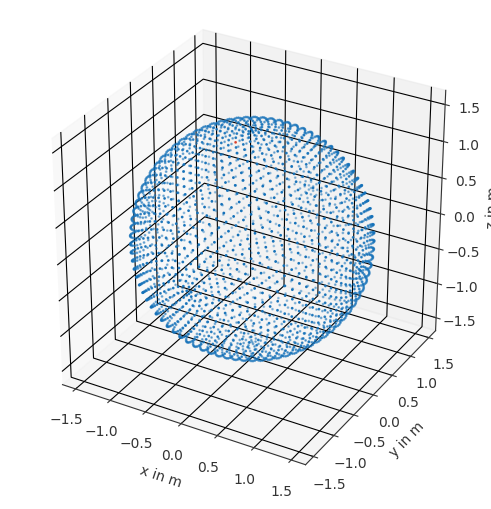

In [47]:
index, *_ = source_coordinates.find_nearest(pf.Coordinates.from_spherical_elevation(48.45952387, -4.9058849,   1.47   ))
source_coordinates.show(index)
plt.show()
